## Project: Image Captioning

---

Use your trained model to generate captions for images in the test dataset.

- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset


In [1]:
from data_loader import get_loader
from torchvision import transforms

# Define a transform to pre-process the testing images.
transform_test = transforms.Compose([ 
    transforms.Resize((256,256)),                          # smaller edge of image resized to 256
    transforms.RandomCrop((224,224)),                      # get 224x224 crop from random location
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test')

1028205764_7e8df9a2ea.jpg
Number of images: 40455


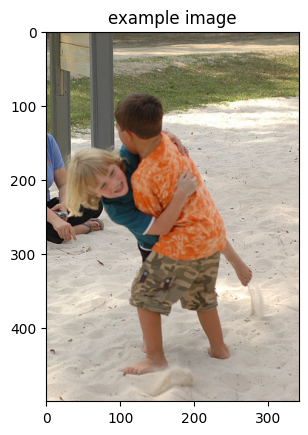

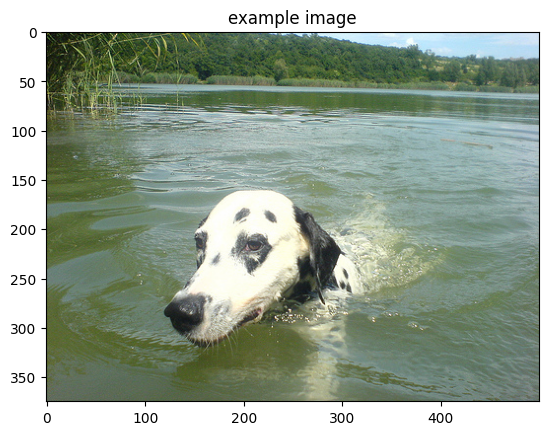

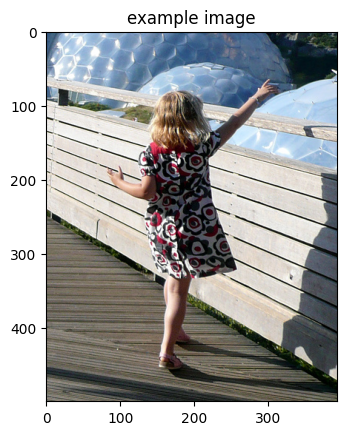

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
for i, batch in enumerate(data_loader):
    orig_image, image = batch
    # Visualize sample image, before pre-processing.
    plt.imshow(np.squeeze(orig_image))
    plt.title('example image')
    plt.show()
    if i == 2:
        break

<a id='step2'></a>
## Step 2: Load Trained Models


In [4]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Watch for any changes in model.py, and re-load it automatically.
%load_ext autoreload
%autoreload 2

In [6]:
import os
import torch
from model import EncoderCNN, DecoderRNN

# Specify the saved models to load.
encoder_file ='encoder-2.pkl' 
decoder_file = 'decoder-2.pkl'

# Select appropriate values for the Python variables below.
embed_size = 256
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

c:\Users\Marey\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Marey\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Marey\AppData\Local\Temp\ipykernel_15996\4068415497.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpick

DecoderRNN(
  (embed): Embedding(3444, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=3444, bias=True)
)

<a id='step3'></a>
## Step 3: Finish the Sampler


In [7]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 2, 1879, 3, 17, 5, 3, 107, 155, 8, 1272, 39, 26, 2058, 16, 1879, 129, 1879, 3, 17]


<a id='step4'></a>
## Step 4: Clean up the Captions


In [8]:
#4: Complete the function.
def clean_sentence(output):
    sentence = ""
    for i in output:
        word = data_loader.dataset.vocab.idx2word[i]
        if (word == data_loader.dataset.vocab.start_word):
            continue
        elif (word == data_loader.dataset.vocab.unk_word):
            continue
        elif (word == data_loader.dataset.vocab.end_word):
            break
        else:
            sentence = sentence + " " + word
    return sentence

In [11]:
sentence = clean_sentence(output)
print('example sentence:', sentence[4:-12])

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence:  girl in a red shirt is swinging on her stomach . 


<a id='step5'></a>
## Step 5: Generate Predictions!


In [14]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence[4:-12])

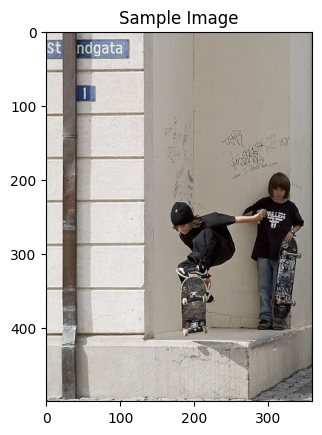

 girl is taking a picture of a girl and guy on a colorfully decorat


In [15]:
get_prediction()

### The model performed well a little bit!


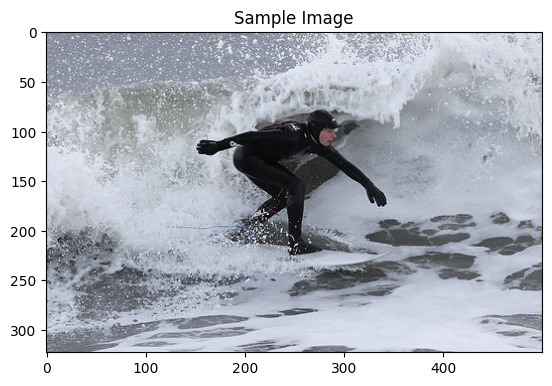

 black dog is swimming in green water with something in its m


In [17]:
get_prediction()

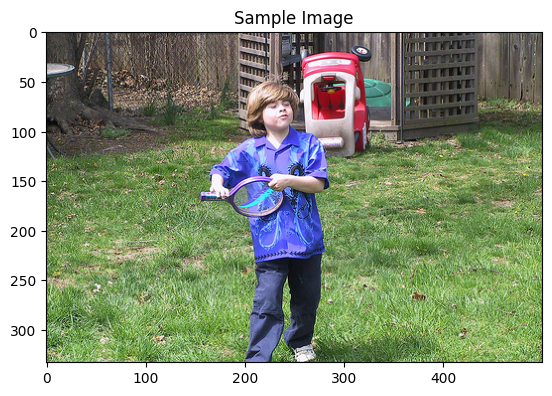

 man in a blue shirt looking to a bike . ' 


In [26]:
get_prediction()

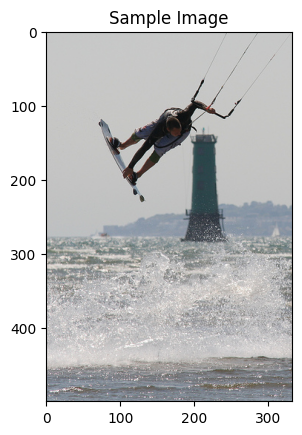

 boy in a swimsuit is playing in water . ' , 


In [20]:
get_prediction()

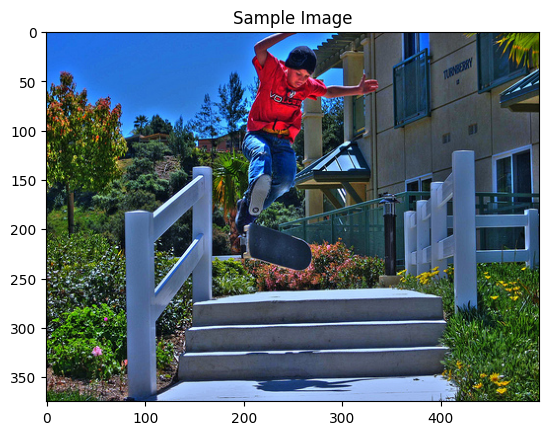

 boy in a yellow shirt training a black poodle ' , 


In [27]:
get_prediction()